### For Google Colab

In [ ]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

Mounted at /content/drive


## The magic begins ...

#### Let's look into `post_metrics_and_comments.csv`

In [ ]:
import pandas as pd

df = pd.read_csv(directory + "data/post_metrics_and_comments.csv")
df

,post_url,username,date_posted,img_urls,caption,max_likes,max_comments,max_views,followers,following,concatenated_comments
0,https://www.instagram.com/p/B-y2oOeDpj2/,064_steady,2020-04-10,{https://finesse-instagram-post-images.s3-us-w...,온라인개학으로 아침마다 아이들에게 모닝콜을 해줄 수 있어서 행복합니다. 하하하하😭 ...,1019,38,NaN,8423,697,@_o9.02 가입하자 연재야😘|아고 ㅠㅠㅠㅠ 힘드실텐데 아자아자 화이팅입니다 !!...
1,https://www.instagram.com/p/B_B4e5qDtOU/,064_steady,2020-04-16,{https://finesse-instagram-post-images.s3-us-w...,2014. 04. 16. 우리 모두 웃을 수 있기를... more,1039,12,NaN,8423,697,@nam_bbs 정말요?🙌|옷입는 스타일 너무너무 멋있으세요 ☺️|코디 너무 좋아요...
2,https://www.instagram.com/p/B-3-Skoj2ub/,064_steady,2020-04-12,{https://finesse-instagram-post-images.s3-us-w...,내일이 월요일이니까 웃자😁... more,764,35,NaN,8423,697,❤️|헐 선생님....멋져요....♥️|워료일 쪼아~ 최고로 쪼아~|Very sum...
3,https://www.instagram.com/p/B_UhfCuDnJU/,064_steady,2020-04-23,{https://finesse-instagram-post-images.s3-us-w...,너무 배불러요 ㅠㅠㅠ... more,779,56,NaN,8423,697,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ배불러졌다는게 너무 웃겨욬ㅋㅋㅋㅋㅋ|깔끔한 쓰앵님🤭👍🏿|😍😍😍😍❤...
4,https://www.instagram.com/p/B-6isIeD-0-/,064_steady,2020-04-13,{https://finesse-instagram-post-images.s3-us-w...,월요병 극복🥴,733,26,NaN,8423,697,극복 나이스👍🏻|@mndp404 시간은 결국 흐르니 ㅠㅠ|내일도 화요팅~!|@yeo...
...,...,...,...,...,...,...,...,...,...,...,...
11632,https://www.instagram.com/p/B_AlZo0AWJX/,zoeygrossman,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,🖤Gorgeous sweet Angel @dualipa for @elleusa ❤️...,12269,153,NaN,222000,1393,🔥|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️...
11633,https://www.instagram.com/p/B_F0LX6laRg/,zoeygrossman,2020-04-17,{https://finesse-instagram-post-images.s3-us-w...,"🖤🔥🔥🔥🖤 @dualipa who is the sweetest, talented i...",9659,99,NaN,222000,1393,❤️|💙💙💚|YES!!! One of my last shoots before the...
11634,https://www.instagram.com/p/B-xmPs4F_br/,zoeygrossman,2020-04-09,{https://finesse-instagram-post-images.s3-us-w...,One of my favorite outtakes of beautiful @hail...,8228,133,NaN,222000,1393,💐💐💐💐👏🏼🔝🔝🔝🎉|Verified ✨✨|Wow😍|😍😍😍😍|beautiful bab...
11635,https://www.instagram.com/p/B-7FRqKpzy3/,zoyaekhann,2020-04-13,{https://finesse-instagram-post-images.s3-us-w...,give me a nickname,1442,93,NaN,7749,130,Happy birthday 😍 reply to dena Bali ho nhi 🙌|👶...


In [ ]:
import numpy as np
usernames = df.username.unique() # [['username', 'followers']].unique()
# user_accounts = df[]
usernames = np.array(usernames)

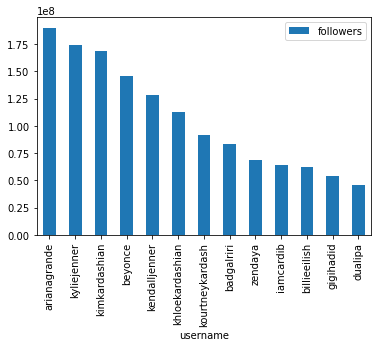

In [ ]:
# Create a bar chart displaying the top 1% of accounts in terms of followers
# from the dataset
user_accounts = df[['username', 'followers']]
user_accounts = user_accounts.drop_duplicates(subset="username")
user_accounts = user_accounts.set_index(['username'], drop=True)
user_accounts = user_accounts.sort_values(by=["followers"], axis=0, ascending=False)
num_accounts = len(user_accounts.index)
user_accounts = user_accounts.nlargest(int(num_accounts*0.01), 'followers')
top_1_percent_accounts = user_accounts.plot.bar(y="followers")

In [ ]:
# Check which posts received the most number of likes
posts = df[['post_url', 'max_likes', 'username']]
posts = posts.sort_values(by=["max_likes"], axis=0, ascending=False)
num_posts = len(posts.index)
top_0_1_posts = posts.nlargest(int(num_posts*0.001), 'max_likes')
top_0_1_posts

# See who published these posts
# top_0_1_percent_posts = top_0_1_posts.plot.bar(x="username", y="max_likes")

,post_url,max_likes,username
6314,https://www.instagram.com/p/B_GxLGFFQvu/,11025440,billieeilish
2956,https://www.instagram.com/p/B_OHkPMnJr0/,10203237,kyliejenner
8774,https://www.instagram.com/p/B_DR5aNnDR1/,9130384,kyliejenner
8773,https://www.instagram.com/p/B-5dXt6HwjM/,7796613,kyliejenner
2828,https://www.instagram.com/p/B_QUaMpjEq5/,7326552,kendalljenner
8656,https://www.instagram.com/p/B-3BLbJjjnX/,7058172,kendalljenner
8772,https://www.instagram.com/p/B-iPbHIndC_/,7027935,kyliejenner
2955,https://www.instagram.com/p/B-kotcGnVEF/,5751243,kyliejenner
418,https://www.instagram.com/p/B_LoRVAHj6y/,5283711,badgalriri
5757,https://www.instagram.com/p/B--n6suAkmf/,5261516,zendaya


In [ ]:
# Check which posts received the most number of view
videos = df[['post_url', 'max_views', 'username']]
videos = videos.sort_values(by=["max_views"], axis=0, ascending=False)
num_videos = len(videos.index)
top_0_1_videos = videos.nlargest(int(num_videos*0.001), 'max_views')
top_0_1_videos

# See who published these posts
# top_0_1_percent_videos = top_0_1_videos.plot.bar(x="username", y="max_views")

,post_url,max_views,username
8772,https://www.instagram.com/p/B-iPbHIndC_/,36643177.0,kyliejenner
2163,https://www.instagram.com/p/B-u0w9Xg1OJ/,11366343.0,iamcardib
2158,https://www.instagram.com/p/B-ffCd8gA3K/,10368266.0,iamcardib
494,https://www.instagram.com/p/B_JeyBhnkox/,9893477.0,beyonce
6080,https://www.instagram.com/p/B-swOeHFzbb/,9654503.0,arianagrande
1498,https://www.instagram.com/p/B-gOwIYp9jd/,6945789.0,emrata
6308,https://www.instagram.com/p/B_JmWqMHE1L/,6467155.0,beyonce
6282,https://www.instagram.com/p/B-8OREaAZec/,6173929.0,bellahadid
2162,https://www.instagram.com/p/B-p32PHgFbI/,6090814.0,iamcardib
8021,https://www.instagram.com/p/B_I57QLgO5B/,5622673.0,iamcardib


In [ ]:
# Check which posts received the most number of view
videos = df[['post_url', 'max_views', 'username']]
videos = videos.sort_values(by=["max_views"], axis=0, ascending=False)
num_videos = len(videos.index)
top_0_1_videos = videos.nlargest(int(num_videos*0.001), 'max_views')
top_0_1_videos

# See who published these posts
# top_0_1_percent_videos = top_0_1_videos.plot.bar(x="username", y="max_views")

#### Let's work now with the `raw_post_metric` dataset

In [ ]:
import pandas as pd

raw_post_metrics = pd.read_csv(directory + "data/raw_post_metrics.csv")
raw_post_metrics

,post_url,num_likes,num_comments,num_views,date_time_collected
0,https://www.instagram.com/p/B_PNBlGDTYQ/,647,15,NaN,2020-04-21 21:00:41
1,https://www.instagram.com/p/B-jWhHKjDsa/,925,105,NaN,2020-04-21 21:11:39
2,https://www.instagram.com/p/B-eNiazDOXp/,987,73,NaN,2020-04-21 21:11:42
3,https://www.instagram.com/p/B-oswDhDUB4/,960,73,NaN,2020-04-21 21:11:47
4,https://www.instagram.com/p/B-rM41AD62p/,715,67,NaN,2020-04-21 21:11:49
...,...,...,...,...,...
70527,https://www.instagram.com/p/B-m6FjqAb4-/,4080,16,NaN,2020-06-09 22:45:11
70528,https://www.instagram.com/p/B-mBkI2gU44/,5504,21,34598.0,2020-06-09 23:09:05
70529,https://www.instagram.com/p/B-ea5Tvgy3q/,2237,11,NaN,2020-06-09 23:14:34
70530,https://www.instagram.com/p/B_c0NRNAOUa/,3061,16,NaN,2020-06-09 23:19:41


In [ ]:
print(raw_post_metrics.dtypes)

post_url                object
num_likes                int64
num_comments             int64
num_views              float64
date_time_collected     object
dtype: object


In [ ]:
raw_post_metrics["date_time_collected"] = pd.to_datetime(raw_post_metrics["date_time_collected"])
print(raw_post_metrics.dtypes)

post_url                       object
num_likes                       int64
num_comments                    int64
num_views                     float64
date_time_collected    datetime64[ns]
dtype: object


In [ ]:
raw_post_metrics.sort_values(by='date_time_collected', inplace=True)
raw_post_metrics

,post_url,num_likes,num_comments,num_views,date_time_collected
0,https://www.instagram.com/p/B_PNBlGDTYQ/,647,15,NaN,2020-04-21 21:00:41
45244,https://www.instagram.com/p/B-wNaNEjAJo/,883,13,NaN,2020-04-21 21:01:35
45245,https://www.instagram.com/p/B-l3-9rjzOg/,880,59,NaN,2020-04-21 21:01:36
45247,https://www.instagram.com/p/B-wNaNEjAJo/,883,13,NaN,2020-04-21 21:07:15
45246,https://www.instagram.com/p/B-8XQ-xjp7W/,1202,41,NaN,2020-04-21 21:07:15
...,...,...,...,...,...
70455,https://www.instagram.com/p/B-umzJlgaWH/,2004,8,NaN,2020-06-09 22:57:46
70528,https://www.instagram.com/p/B-mBkI2gU44/,5504,21,34598.0,2020-06-09 23:09:05
70529,https://www.instagram.com/p/B-ea5Tvgy3q/,2237,11,NaN,2020-06-09 23:14:34
70530,https://www.instagram.com/p/B_c0NRNAOUa/,3061,16,NaN,2020-06-09 23:19:41


In [ ]:
raw_post_metrics_2 = raw_post_metrics.groupby('post_url').agg(list)
raw_post_metrics_2

,num_likes,num_comments,num_views,date_time_collected
post_url,,,,
https://www.instagram.com/p/B---FmPHkqj/,"[12360, 12562]","[140, 140]","[nan, nan]","[2020-04-21 21:24:14, 2020-05-12 03:56:33]"
https://www.instagram.com/p/B---T2DAOs8/,"[589, 617]","[20, 21]","[nan, nan]","[2020-04-23 23:57:04, 2020-05-12 03:50:30]"
https://www.instagram.com/p/B---Ylep4Jr/,"[3424, 3496]","[36, 36]","[nan, nan]","[2020-04-22 02:12:39, 2020-05-12 03:45:51]"
https://www.instagram.com/p/B--0UE5nB6t/,"[38304, 38993]","[391, 401]","[nan, nan]","[2020-04-23 22:53:29, 2020-05-12 03:49:52]"
https://www.instagram.com/p/B--0oAshPus/,"[945, 1025]","[78, 80]","[nan, nan]","[2020-04-21 22:03:30, 2020-05-12 03:55:18]"
...,...,...,...,...
https://www.instagram.com/p/B_nyeH-HpQt/,[318850],[1919],[nan],[2020-05-13 02:05:34]
https://www.instagram.com/p/B_nyvtGpBsw/,[53],[0],[nan],[2020-05-12 18:29:14]
https://www.instagram.com/p/B_nzcofhI-W/,[490],[0],[nan],[2020-05-12 15:10:56]


In [ ]:
# TODO: Calculate the difference in likes

### Finally, let's see what the `hashtag_top_appearances` dataset looks like

In [ ]:
hashtag_top_appearances = pd.read_csv(directory + "data/hashtag_top_appearances.csv", index_col=["post_url"])
hashtag_top_appearances

,days_in_hashtag_top_section
post_url,
https://www.instagram.com/p/B-zJQlUI6uN/,38
https://www.instagram.com/p/B-cuVYrJncn/,36
https://www.instagram.com/p/B_CHJzXDeNF/,33
https://www.instagram.com/p/B-_07jGpiWT/,29
https://www.instagram.com/p/B-xB_snKjld/,29
...,...
https://www.instagram.com/p/B_ZztTfnILj/,0
https://www.instagram.com/p/B_ZzU2rp_jp/,0
https://www.instagram.com/p/B-zzv2WgOJI/,0


### Good stuff, now let's join all the datasets together

In [ ]:
post_metrics_and_comments.loc["https://www.instagram.com/p/B-cuVYrJncn/"]

username                                                         xxlexx007
date_posted                                                     2020-04-01
img_urls                 {https://finesse-instagram-post-images.s3-us-w...
caption                            i’m a gorilla in a f*ckin coupe... more
max_likes                                                             2283
max_comments                                                           151
max_views                                                              NaN
followers                                                             4487
following                                                              896
concatenated_comments    @opulent_____clothing 👊🏾👊🏾|@opulent_____clothi...
Name: https://www.instagram.com/p/B-cuVYrJncn/, dtype: object

In [ ]:
raw_post_metrics_2 = raw_post_metrics_2.sort_index(axis=0)
raw_post_metrics_2.loc["https://www.instagram.com/p/B-cuVYrJncn/"]

num_likes              [2159, 2159, 2159, 2192, 2192, 2192, 2193, 219...
num_comments           [150, 150, 150, 151, 151, 151, 151, 151, 151, ...
num_views              [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
date_time_collected    [2020-04-21 21:31:31, 2020-04-21 22:47:55, 202...
Name: https://www.instagram.com/p/B-cuVYrJncn/, dtype: object

In [ ]:
post_metrics_and_comments = pd.read_csv(directory + "data/post_metrics_and_comments.csv", index_col=["post_url"])
hashtag_top_appearances = pd.read_csv(directory + "data/hashtag_top_appearances.csv", index_col=["post_url"])
merged_left = pd.merge(left=post_metrics_and_comments, right=hashtag_top_appearances, how='left', left_on='post_url', right_on='post_url')
complete_dataset = pd.merge(left=merged_left, right=raw_post_metrics_2, how='left', left_on='post_url', right_on='post_url')
complete_dataset.sort_values(by=["days_in_hashtag_top_section"], axis=0, ascending=False, inplace=True)

# Convert date_posted to datetime format
complete_dataset["date_posted"] = pd.to_datetime(complete_dataset["date_posted"])

# Convert concatenated_comments to list of comments
def conv_to_list_comments(row):
    if pd.isnull(row["concatenated_comments"]):
        return None
    else:
        list_comments = row["concatenated_comments"].split("|")
        return list_comments
complete_dataset['concatenated_comments'] = complete_dataset.apply(lambda row: conv_to_list_comments(row), axis=1)

print(complete_dataset.dtypes)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
username                               object
date_posted                    datetime64[ns]
img_urls                               object
caption                                object
max_likes                               int64
max_comments                            int64
max_views                             float64
followers                               int64
following                               int64
concatenated_comments                  object
days_in_hashtag_top_section             int64
num_likes                              object
num_comments                           object
num_views                              object
date_time_collected                    object
dtype: object


In [ ]:
complete_dataset

,username,date_posted,img_urls,caption,max_likes,max_comments,max_views,followers,following,concatenated_comments,days_in_hashtag_top_section,num_likes,num_comments,num_views,date_time_collected
post_url,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,xxlexx007,2020-04-01,{https://finesse-instagram-post-images.s3-us-w...,i’m a gorilla in a f*ckin coupe... more,2283,151,NaN,4487,896,@opulent_____clothing 👊🏾👊🏾|@opulent_____clothi...,36,"[2159, 2159, 2159, 2192, 2192, 2192, 2193, 219...","[150, 150, 150, 151, 151, 151, 151, 151, 151, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-21 21:31:31, 2020-04-21 22:47:55, 202..."
https://www.instagram.com/p/B_CHJzXDeNF/,vinceropitini,2020-04-16,{https://finesse-instagram-post-images.s3-us-w...,bitta og obsolescence for your timeline x,1109,50,NaN,4038,1109,@zack.paterson heheh 🥵🥺|@zack.paterson heheh 🥵...,33,"[942, 948, 950, 955, 980, 981, 981, 981, 981, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-21 21:17:51, 2020-04-21 22:34:59, 202..."
https://www.instagram.com/p/B-_07jGpiWT/,squardes_,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,Gm 🌈 | follow @squardes_,506,4,NaN,25000,26,Gm 🌈 | follow @squardes_|❤|A fit🎉🎉🎉🎉|@squardes...,29,"[495, 495, 495, 495, 495, 495, 495, 495, 495, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-24 00:12:49, 2020-04-24 03:01:52, 202..."
https://www.instagram.com/p/B-xB_snKjld/,squardes_,2020-04-09,{https://finesse-instagram-post-images.s3-us-w...,Clean?🌊 | follow @squardes_,1758,14,NaN,25000,26,"Hey Bro! Love your vibe, let’s collab. DM main...",29,"[1743, 1748, 1748, 1752, 1751, 1751, 1751, 175...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-23 22:40:57, 2020-04-25 17:51:12, 202..."
https://www.instagram.com/p/B-9fgRUqRo5/,misfashionedsneakers,2020-04-14,{https://finesse-instagram-post-images.s3-us-w...,Comic - @toobrokeforysl ... more,20478,31,NaN,48600,5,1TAG=+100 IQ @ayepixel|@falak_ghauri 🥺|@falak_...,28,"[19112, 19810, 19828, 19841, 19863, 19883, 198...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-22 01:20:40, 2020-04-23 22:50:18, 202..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,oh.2x,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,What color is your favorite for our reflective...,1365,5,NaN,37900,2,What color is your favorite for our reflective...,0,"[1357, 1365]","[5, 5]","[nan, nan]","[2020-04-23 23:42:57, 2020-05-12 03:48:17]"
https://www.instagram.com/p/B_O9cFuAgCb/,oh.2x,2020-04-21,{https://finesse-instagram-post-images.s3-us-w...,Essential Striped Shirt for the summer .... more,718,5,NaN,37900,2,Essential Striped Shirt for the summer . . . ....,0,"[652, 718]","[0, 5]","[nan, nan]","[2020-04-23 23:42:27, 2020-05-12 04:55:08]"
https://www.instagram.com/p/B-7s7uhnD_v/,oh.2x,2020-04-13,{https://finesse-instagram-post-images.s3-us-w...,Faded V Neck Sweater.... more,1100,0,NaN,37900,2,Real rockstar SHxT 🎸|Faded V Neck Sweater. . ....,0,"[1087, 1100]","[0, 0]","[nan, nan]","[2020-04-23 23:42:48, 2020-05-12 03:35:43]"


#### The evolution of the likes of the top trending post

days_in_hashtag_top_section 36
Average increase of likes per day 53.093023255813954


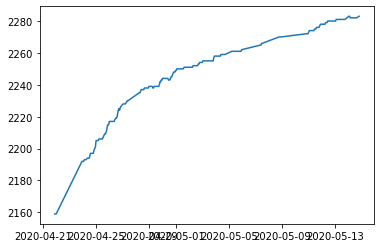

In [ ]:
import matplotlib.pyplot as plt

days_in_hashtag_top_section = complete_dataset.loc["https://www.instagram.com/p/B-cuVYrJncn/"].days_in_hashtag_top_section
date_posted = complete_dataset.loc["https://www.instagram.com/p/B-cuVYrJncn/"].date_posted
max_likes = complete_dataset.loc["https://www.instagram.com/p/B-cuVYrJncn/"].max_likes
likes = complete_dataset.loc["https://www.instagram.com/p/B-cuVYrJncn/"].num_likes
dates = complete_dataset.loc["https://www.instagram.com/p/B-cuVYrJncn/"].date_time_collected
print("days_in_hashtag_top_section", days_in_hashtag_top_section)
delta = dates[-1] - date_posted
rate_likes = max_likes/delta.days
print("Average increase of likes per day", rate_likes)
plt.plot(dates, likes)

#### Create the rate_like feature

In [ ]:
"""
All the posts have the date_time_collected and date_posted values so we will 
always know the rate at which the number of likes increased per day
"""

# Create the rate_like feature
def calc_rate_likes(row):
    if pd.isnull(row["date_time_collected"][-1]):
        return None
    else:
        date_posted = row["date_posted"]
        max_likes = row["max_likes"]
        dates = row["date_time_collected"]
        delta = dates[-1] - date_posted
        if delta.days == 0:
            return max_likes
        rate_likes = max_likes/delta.days
        return rate_likes

complete_dataset['rate_likes'] = complete_dataset.apply(lambda row: calc_rate_likes(row), axis=1)
complete_dataset

,username,date_posted,img_urls,caption,max_likes,max_comments,max_views,followers,following,concatenated_comments,days_in_hashtag_top_section,num_likes,num_comments,num_views,date_time_collected,rate_comments,rate_likes
post_url,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,xxlexx007,2020-04-01,{https://finesse-instagram-post-images.s3-us-w...,i’m a gorilla in a f*ckin coupe... more,2283,151,NaN,4487,896,"[@opulent_____clothing 👊🏾👊🏾, @opulent_____clot...",36,"[2159, 2159, 2159, 2192, 2192, 2192, 2193, 219...","[150, 150, 150, 151, 151, 151, 151, 151, 151, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-21 21:31:31, 2020-04-21 22:47:55, 202...",3.511628,53.093023
https://www.instagram.com/p/B_CHJzXDeNF/,vinceropitini,2020-04-16,{https://finesse-instagram-post-images.s3-us-w...,bitta og obsolescence for your timeline x,1109,50,NaN,4038,1109,"[@zack.paterson heheh 🥵🥺, @zack.paterson heheh...",33,"[942, 948, 950, 955, 980, 981, 981, 981, 981, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-21 21:17:51, 2020-04-21 22:34:59, 202...",1.428571,31.685714
https://www.instagram.com/p/B-_07jGpiWT/,squardes_,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,Gm 🌈 | follow @squardes_,506,4,NaN,25000,26,"[Gm 🌈 , follow @squardes_, ❤, A fit🎉🎉🎉🎉, @squ...",29,"[495, 495, 495, 495, 495, 495, 495, 495, 495, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-24 00:12:49, 2020-04-24 03:01:52, 202...",0.111111,14.055556
https://www.instagram.com/p/B-xB_snKjld/,squardes_,2020-04-09,{https://finesse-instagram-post-images.s3-us-w...,Clean?🌊 | follow @squardes_,1758,14,NaN,25000,26,"[Hey Bro! Love your vibe, let’s collab. DM mai...",29,"[1743, 1748, 1748, 1752, 1751, 1751, 1751, 175...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-23 22:40:57, 2020-04-25 17:51:12, 202...",0.333333,41.857143
https://www.instagram.com/p/B-9fgRUqRo5/,misfashionedsneakers,2020-04-14,{https://finesse-instagram-post-images.s3-us-w...,Comic - @toobrokeforysl ... more,20478,31,NaN,48600,5,"[1TAG=+100 IQ @ayepixel, @falak_ghauri 🥺, @fal...",28,"[19112, 19810, 19828, 19841, 19863, 19883, 198...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-22 01:20:40, 2020-04-23 22:50:18, 202...",0.837838,553.459459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,oh.2x,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,What color is your favorite for our reflective...,1365,5,NaN,37900,2,[What color is your favorite for our reflectiv...,0,"[1357, 1365]","[5, 5]","[nan, nan]","[2020-04-23 23:42:57, 2020-05-12 03:48:17]",0.185185,50.555556
https://www.instagram.com/p/B_O9cFuAgCb/,oh.2x,2020-04-21,{https://finesse-instagram-post-images.s3-us-w...,Essential Striped Shirt for the summer .... more,718,5,NaN,37900,2,[Essential Striped Shirt for the summer . . . ...,0,"[652, 718]","[0, 5]","[nan, nan]","[2020-04-23 23:42:27, 2020-05-12 04:55:08]",0.238095,34.190476
https://www.instagram.com/p/B-7s7uhnD_v/,oh.2x,2020-04-13,{https://finesse-instagram-post-images.s3-us-w...,Faded V Neck Sweater.... more,1100,0,NaN,37900,2,"[Real rockstar SHxT 🎸, Faded V Neck Sweater. ....",0,"[1087, 1100]","[0, 0]","[nan, nan]","[2020-04-23 23:42:48, 2020-05-12 03:35:43]",0.000000,37.931034


#### Create the rate_comment feature

In [ ]:
# Create the rate_like feature
def calc_rate_comments(row):
    if pd.isnull(row["date_time_collected"][-1]):
        return None
    else:
        date_posted = row["date_posted"]
        max_comments = row["max_comments"]
        dates = row["date_time_collected"]
        delta = dates[-1] - date_posted
        if delta.days == 0:
            return max_comments
        rate_comments = max_comments/delta.days
        return rate_comments

complete_dataset['rate_comments'] = complete_dataset.apply(lambda row: calc_rate_comments(row), axis=1)
complete_dataset

Streaming output truncated to the last 5000 lines.
[Timestamp('2020-04-22 05:55:57'), Timestamp('2020-05-12 02:28:48')]
[Timestamp('2020-04-22 05:56:04'), Timestamp('2020-05-12 03:08:48')]
[Timestamp('2020-04-22 05:56:09'), Timestamp('2020-05-12 04:59:30')]
[Timestamp('2020-04-22 05:56:16'), Timestamp('2020-05-12 04:35:04')]
[Timestamp('2020-04-22 05:56:12'), Timestamp('2020-05-12 04:56:29')]
[Timestamp('2020-04-22 05:56:55'), Timestamp('2020-05-12 02:51:24')]
[Timestamp('2020-04-22 05:56:11'), Timestamp('2020-05-12 04:10:26')]
[Timestamp('2020-04-22 05:56:29'), Timestamp('2020-05-12 02:57:55')]
[Timestamp('2020-04-22 05:56:21'), Timestamp('2020-05-12 04:11:44')]
[Timestamp('2020-04-22 05:56:24'), Timestamp('2020-05-12 03:58:03')]
[Timestamp('2020-04-22 05:56:55'), Timestamp('2020-05-12 03:41:11')]
[Timestamp('2020-04-22 05:57:01'), Timestamp('2020-05-12 02:29:32')]
[Timestamp('2020-04-22 05:57:14'), Timestamp('2020-05-12 04:12:28')]
[Timestamp('2020-04-22 05:57:04'), Timestamp('2020-0

,username,date_posted,img_urls,caption,max_likes,max_comments,max_views,followers,following,concatenated_comments,days_in_hashtag_top_section,num_likes,num_comments,num_views,date_time_collected,rate_comments
post_url,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,xxlexx007,2020-04-01,{https://finesse-instagram-post-images.s3-us-w...,i’m a gorilla in a f*ckin coupe... more,2283,151,NaN,4487,896,"[@opulent_____clothing 👊🏾👊🏾, @opulent_____clot...",36,"[2159, 2159, 2159, 2192, 2192, 2192, 2193, 219...","[150, 150, 150, 151, 151, 151, 151, 151, 151, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-21 21:31:31, 2020-04-21 22:47:55, 202...",3.511628
https://www.instagram.com/p/B_CHJzXDeNF/,vinceropitini,2020-04-16,{https://finesse-instagram-post-images.s3-us-w...,bitta og obsolescence for your timeline x,1109,50,NaN,4038,1109,"[@zack.paterson heheh 🥵🥺, @zack.paterson heheh...",33,"[942, 948, 950, 955, 980, 981, 981, 981, 981, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-21 21:17:51, 2020-04-21 22:34:59, 202...",1.428571
https://www.instagram.com/p/B-_07jGpiWT/,squardes_,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,Gm 🌈 | follow @squardes_,506,4,NaN,25000,26,"[Gm 🌈 , follow @squardes_, ❤, A fit🎉🎉🎉🎉, @squ...",29,"[495, 495, 495, 495, 495, 495, 495, 495, 495, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-24 00:12:49, 2020-04-24 03:01:52, 202...",0.111111
https://www.instagram.com/p/B-xB_snKjld/,squardes_,2020-04-09,{https://finesse-instagram-post-images.s3-us-w...,Clean?🌊 | follow @squardes_,1758,14,NaN,25000,26,"[Hey Bro! Love your vibe, let’s collab. DM mai...",29,"[1743, 1748, 1748, 1752, 1751, 1751, 1751, 175...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-23 22:40:57, 2020-04-25 17:51:12, 202...",0.333333
https://www.instagram.com/p/B-9fgRUqRo5/,misfashionedsneakers,2020-04-14,{https://finesse-instagram-post-images.s3-us-w...,Comic - @toobrokeforysl ... more,20478,31,NaN,48600,5,"[1TAG=+100 IQ @ayepixel, @falak_ghauri 🥺, @fal...",28,"[19112, 19810, 19828, 19841, 19863, 19883, 198...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020-04-22 01:20:40, 2020-04-23 22:50:18, 202...",0.837838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,oh.2x,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,What color is your favorite for our reflective...,1365,5,NaN,37900,2,[What color is your favorite for our reflectiv...,0,"[1357, 1365]","[5, 5]","[nan, nan]","[2020-04-23 23:42:57, 2020-05-12 03:48:17]",0.185185
https://www.instagram.com/p/B_O9cFuAgCb/,oh.2x,2020-04-21,{https://finesse-instagram-post-images.s3-us-w...,Essential Striped Shirt for the summer .... more,718,5,NaN,37900,2,[Essential Striped Shirt for the summer . . . ...,0,"[652, 718]","[0, 5]","[nan, nan]","[2020-04-23 23:42:27, 2020-05-12 04:55:08]",0.238095
https://www.instagram.com/p/B-7s7uhnD_v/,oh.2x,2020-04-13,{https://finesse-instagram-post-images.s3-us-w...,Faded V Neck Sweater.... more,1100,0,NaN,37900,2,"[Real rockstar SHxT 🎸, Faded V Neck Sweater. ....",0,"[1087, 1100]","[0, 0]","[nan, nan]","[2020-04-23 23:42:48, 2020-05-12 03:35:43]",0.000000


### Save processed dataset

In [ ]:
# export
import json
from google.colab import drive
if COLAB:
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
    complete_dataset.to_pickle(directory + 'data/complete_dataset.pkl')

## Create a customised dataset

In [ ]:
# import
import json
import pandas as pd
from google.colab import drive
if COLAB:
    path = directory + 'data/'
    complete_dataset = pd.read_pickle(path + 'complete_dataset.pkl')

NameError: ignored

In [ ]:
complete_dataset.dtypes

username                               object
date_posted                    datetime64[ns]
img_urls                               object
caption                                object
max_likes                               int64
max_comments                            int64
max_views                             float64
followers                               int64
following                               int64
concatenated_comments                  object
days_in_hashtag_top_section             int64
num_likes                              object
num_comments                           object
num_views                              object
date_time_collected                    object
rate_comments                         float64
rate_likes                            float64
dtype: object

In [ ]:
predict_days_t = complete_dataset[["username", "followers", "max_likes", "rate_likes", "max_comments", "rate_comments",  "days_in_hashtag_top_section"]]
predict_days_t

NameError: ignored

In [ ]:
# export
import json
from google.colab import drive
if COLAB:
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
    predict_days_t.to_pickle(directory + 'data/predict_days_t.pkl')